<a href="https://colab.research.google.com/github/Ansh420/ASSIGNMENT-UPDATE/blob/main/Flight_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

**The objective of the study is to analyse the flight booking by conduct various statistical hypothesis tests in order to get meaningful information from it. Linear Regression statistical algorithm would be used to train the dataset and predict a continuous target variable.**

In [30]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [31]:
#Import training dataset
train_data = pd.read_excel('/content/Data_Train.xlsx')
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [32]:
train_data.dtypes

,0
Airline,object
Date_of_Journey,object
Source,object
Destination,object
Route,object
Dep_Time,object
Arrival_Time,object
Duration,object
Total_Stops,object
Additional_Info,object


In [33]:
train_data.shape

(10683, 11)

In [34]:
train_data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


<Axes: >

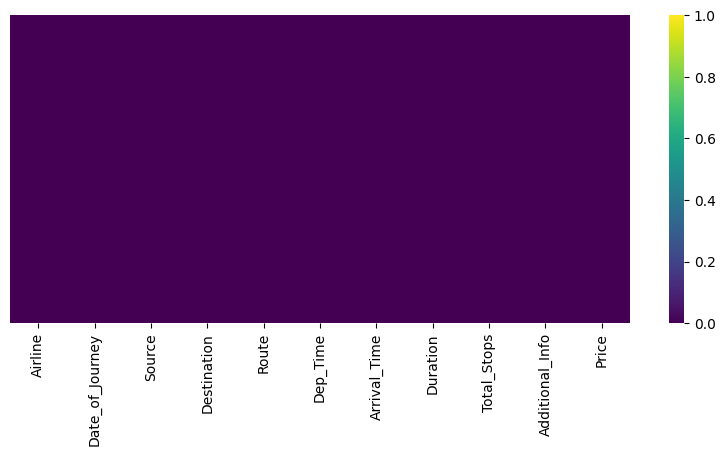

In [36]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10, 4)

sns.heatmap(train_data.isnull(), yticklabels= False, cbar = True, cmap = 'viridis')


In [37]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


# **EDA**

In [38]:
train_data.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


In [39]:
train_data['Airline'].value_counts()

,count
Airline,
Jet Airways,3849
IndiGo,2053
Air India,1752
Multiple carriers,1196
SpiceJet,818
Vistara,479
Air Asia,319
GoAir,194
Multiple carriers Premium economy,13


In [45]:
train_data.groupby(['Airline','Destination']).size().reset_index()

,Airline,Destination,0
0,Air Asia,Banglore,150
1,Air Asia,Cochin,80
2,Air Asia,Delhi,71
3,Air Asia,New Delhi,18
4,Air India,Banglore,512
5,Air India,Cochin,747
6,Air India,Delhi,120
7,Air India,Hyderabad,136
8,Air India,Kolkata,25
9,Air India,New Delhi,212


In [47]:
# Changing Date Format
train_data['day'] = train_data['Date_of_Journey'].apply(lambda x:x.split('/')[0])
train_data['month'] = train_data['Date_of_Journey'].apply(lambda x:x.split('/')[1])
train_data['year'] = train_data['Date_of_Journey'].apply(lambda x:x.split('/')[2])

In [48]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [49]:
train_data['day'] = train_data['day'].astype(int)
train_data['month'] = train_data['month'].astype(int)
train_data['year'] = train_data['year'].astype(int)

In [50]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  day              10683 non-null  int64 
 12  month            10683 non-null  int64 
 13  year             10683 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 1.1+ MB


In [51]:
train_data.drop('Date_of_Journey',axis = 1, inplace = True)

In [52]:
train_data['Arrival_Time'] = train_data['Arrival_Time'].apply(lambda x:x.split(' ')[0])

In [53]:
train_data['Arrival_hour'] = train_data['Arrival_Time'].apply(lambda x:x.split(':')[0])
train_data['Arrival_minutes'] = train_data['Arrival_Time'].apply(lambda x:x.split(':')[1])

In [54]:
train_data['Arrival_hour'] = train_data['Arrival_hour'].astype(int)
train_data['Arrival_minutes'] = train_data['Arrival_minutes'].astype(int)

In [55]:
train_data.drop('Arrival_Time',axis = 1, inplace = True)

In [56]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year,Arrival_hour,Arrival_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,1,3,2019,21,35


In [57]:
# data['Arrival_Time'] = data['Arrival_Time'].apply(lambda x:x.split(' ')[0])

train_data['Dept_hour'] = train_data['Dep_Time'].apply(lambda x:x.split(':')[0])
train_data['Dept_minutes'] = train_data['Dep_Time'].apply(lambda x:x.split(':')[1])

train_data['Dept_hour'] = train_data['Dept_hour'].astype(int)
train_data['Dept_minutes'] = train_data['Dept_minutes'].astype(int)

train_data.drop('Dep_Time',axis = 1, inplace = True)

In [58]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day,month,year,Arrival_hour,Arrival_minutes,Dept_hour,Dept_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50


In [59]:
train_data['Route'].value_counts()

,count
Route,
DEL → BOM → COK,2376
BLR → DEL,1552
CCU → BOM → BLR,979
CCU → BLR,724
BOM → HYD,621
...,...
CCU → VTZ → BLR,1
CCU → IXZ → MAA → BLR,1
BOM → COK → MAA → HYD,1


In [60]:
train_data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [62]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day,month,year,Arrival_hour,Arrival_minutes,Dept_hour,Dept_minutes
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480,6,5,2019,9,25,9,45


In [63]:
# Instead of Focusing on 'Route' we will focus on 'Total_Stops' coz its easy and the ticket price would drastically change
# if there are multiple stops.
# we replace nan value with one coz from Delhi to Cochin there would atleast be 1 stop and only 1 nan value is present so it would not get affect a lot

train_data['Total_Stops'] = train_data['Total_Stops'].map({'non-stop':0, '2 stops':1, '1 stop' : 2, '3 stops' : 3, '4 stops' : 4, 'nan' : 1})

In [64]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

train_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [65]:
train_data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,day,month,year,Arrival_hour,Arrival_minutes,Dept_hour,Dept_minutes
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,1.0,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,1.0,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,2.0,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,2.0,13302,1,3,2019,21,35,16,50


In [67]:
train_data.dtypes

,0
Airline,object
Source,object
Destination,object
Duration,object
Total_Stops,float64
Price,int64
day,int64
month,int64
year,int64
Arrival_hour,int64


In [68]:
# Changing Duration to minutes

duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute #why strip is used here?
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [69]:
#adding columns 'Duration_hours' and 'Duration_minutes' into dataset 'train_data'

train_data['Duration_hours'] = duration_hours
train_data['Duration_minutes'] = duration_mins

#get first 5 rows
train_data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,day,month,year,Arrival_hour,Arrival_minutes,Dept_hour,Dept_minutes,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,3897,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,7h 25m,1.0,7662,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,19h,1.0,13882,9,6,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,2.0,6218,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,2.0,13302,1,3,2019,21,35,16,50,4,45


In [70]:
train_data.isnull().sum()

,0
Airline,0
Source,0
Destination,0
Duration,0
Total_Stops,1
Price,0
day,0
month,0
year,0
Arrival_hour,0


In [71]:
train_data.dropna(subset = ['Total_Stops'], inplace=True)

In [72]:
train_data.isnull().sum()

,0
Airline,0
Source,0
Destination,0
Duration,0
Total_Stops,0
Price,0
day,0
month,0
year,0
Arrival_hour,0


In [73]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           10682 non-null  object 
 1   Source            10682 non-null  object 
 2   Destination       10682 non-null  object 
 3   Duration          10682 non-null  object 
 4   Total_Stops       10682 non-null  float64
 5   Price             10682 non-null  int64  
 6   day               10682 non-null  int64  
 7   month             10682 non-null  int64  
 8   year              10682 non-null  int64  
 9   Arrival_hour      10682 non-null  int64  
 10  Arrival_minutes   10682 non-null  int64  
 11  Dept_hour         10682 non-null  int64  
 12  Dept_minutes      10682 non-null  int64  
 13  Duration_hours    10682 non-null  int64  
 14  Duration_minutes  10682 non-null  int64  
dtypes: float64(1), int64(10), object(4)
memory usage: 1.3+ MB


In [74]:
train_data.drop('Duration',axis = 1, inplace = True)

In [75]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,day,month,year,Arrival_hour,Arrival_minutes,Dept_hour,Dept_minutes,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,0.0,3897,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,1.0,7662,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,1.0,13882,9,6,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,2.0,6218,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,2.0,13302,1,3,2019,21,35,16,50,4,45


In [76]:
train_data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

# **Apply various encoding methods for Airline, Source and Destination**

In [77]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = train_data[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first= True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False


In [78]:
train_data["Source"].value_counts()

,count
Source,
Delhi,4536
Kolkata,2871
Banglore,2197
Mumbai,697
Chennai,381


In [79]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = train_data[["Source"]]
Source = pd.get_dummies(Source, drop_first= True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False


In [80]:
train_data["Destination"].value_counts()

,count
Destination,
Cochin,4536
Banglore,2871
Delhi,1265
New Delhi,932
Hyderabad,697
Kolkata,381


In [81]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = train_data[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,False,False,False,False,True
1,False,False,False,False,False
2,True,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,True


In [82]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,day,month,year,Arrival_hour,Arrival_minutes,Dept_hour,Dept_minutes,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,0.0,3897,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,1.0,7662,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,1.0,13882,9,6,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,2.0,6218,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,2.0,13302,1,3,2019,21,35,16,50,4,45


In [83]:
# Combining Airline,Source and Destination into train_dataset

train_dataset = pd.concat([train_data, Airline, Source, Destination], axis = 1)

In [84]:
train_dataset.head()

,Airline,Source,Destination,Total_Stops,Price,day,month,year,Arrival_hour,Arrival_minutes,Dept_hour,Dept_minutes,Duration_hours,Duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0.0,3897,24,3,2019,1,10,22,20,2,50,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,Air India,Kolkata,Banglore,1.0,7662,1,5,2019,13,15,5,50,7,25,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,Jet Airways,Delhi,Cochin,1.0,13882,9,6,2019,4,25,9,25,19,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,IndiGo,Kolkata,Banglore,2.0,6218,12,5,2019,23,30,18,5,5,25,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,IndiGo,Banglore,New Delhi,2.0,13302,1,3,2019,21,35,16,50,4,45,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [85]:
train_dataset.drop(["Airline", "Source", "Destination","year"], axis = 1, inplace = True)

In [86]:
train_dataset.head()

,Total_Stops,Price,day,month,Arrival_hour,Arrival_minutes,Dept_hour,Dept_minutes,Duration_hours,Duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,3897,24,3,1,10,22,20,2,50,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,1.0,7662,1,5,13,15,5,50,7,25,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,1.0,13882,9,6,4,25,9,25,19,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,2.0,6218,12,5,23,30,18,5,5,25,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,2.0,13302,1,3,21,35,16,50,4,45,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [87]:
train_dataset.shape

(10682, 30)

# **TEST DATA**

In [88]:
test_data = pd.read_excel('/content/Test_set.xlsx')

In [89]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [90]:
# Making changes save as we have done on train dataset

test_data.shape

#checking number of missing values
test_data.isnull().sum()

#Route--> null values=1 and Total_Stops--> null values=1, so we can ignore them
test_data.dropna(inplace=True)

# check again
test_data.isnull().sum()

#statistical analysis(description)
test_data.describe()


# EDA

#converting to 'datetime'
test_data['Date_of_Journey'] = pd.to_datetime(test_data.Date_of_Journey, format='%d/%m/%Y')

#adding new columns(Journey_day, Journey_month, Journey_year) out of column(Date_of_Journey)
#extracting day
test_data['Journey_day'] = test_data['Date_of_Journey'].dt.day
#extracting month
test_data['Journey_month'] = test_data['Date_of_Journey'].dt.month

#drop column 'Date_of_Journey' as it's of no use now
test_data.drop(['Date_of_Journey'], axis=1, inplace=True)

#converting 'Arrival_Time' to 'datetime'
test_data['Arrival_Time'] = pd.to_datetime(test_data.Arrival_Time)

#adding new columns(Arrival_hour, Arrival_minute)
#extracting Arrival hour
test_data['Arrival_hour'] = test_data['Arrival_Time'].dt.hour
#extracting Arrival minute
test_data['Arrival_minute'] = test_data['Arrival_Time'].dt.minute

#drop column 'Arrival_Time' as it's of no use now
test_data.drop(['Arrival_Time'], axis=1, inplace=True)

#converting 'Dep_Time' to 'datetime'
test_data['Dep_Time'] = pd.to_datetime(test_data.Dep_Time)

#adding new columns(Dep_hour, Dep_minute)
#extracting Depature hour
test_data['Dep_hour'] = test_data['Dep_Time'].dt.hour
#extracting Departure minute
test_data['Dep_minute'] = test_data['Dep_Time'].dt.minute

#drop column 'Dep_Time' as it's of no use now
test_data.drop(['Dep_Time'], axis=1, inplace=True)

# 'Duration'--> Time taken by plane to reach destination.
# It is the differnce between Departure time and Arrival time

# Assigning and converting Duration column into list to extract values one-by-one in for-loop
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute #why strip is used here?
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

#adding columns 'Duration_hours' and 'Duration_minutes' into dataset 'train_data'
test_data['Duration_hours'] = duration_hours
test_data['Duration_minutes'] = duration_mins

#drop column 'Duration' as it's of no use now
test_data.drop(['Duration'], axis=1, inplace=True)


#HANDLING CATEGORICAL DATA

#checking distribution of categorical data(Airline)
print(test_data.Airline.value_counts(),"\n")

#As Airline--> Nominal Categorical Data, so we perform 'OneHotEncoding'
#make a dataframe named 'Airline'
Airline = test_data['Airline']
Airline = pd.get_dummies(Airline, drop_first=True)

#checking distribution of categorical data(Source)
print(test_data.Source.value_counts(),"\n")

#As Source--> Nominal Categorical Data, so we perform 'OneHotEncoding'
#make a dataframe named 'Source'
Source = test_data['Source']
Source = pd.get_dummies(Source, drop_first=True)

#checking distribution of categorical data(Destination)
print(test_data.Destination.value_counts(),"\n")

#As Destination--> Nominal Categorical Data, so we perform 'OneHotEncoding'
#make a dataframe named 'Destination'
Destination = test_data['Destination']
Destination = pd.get_dummies(Destination, drop_first=True)

#checking distribution of categorical data(Route)
test_data['Route'].value_counts()

#as 'Total_Stops' and 'Route' are related(dependent on) to each other, so we can drop 'Route'.
test_data.drop(['Route'], axis=1, inplace=True)

#checking distribution of categorical data(Total_Stops)
print(train_data.Total_Stops.value_counts(),"\n")

#As Total_Stops --> Ordinal Categorical Data, so we perform 'LabelEncoding'
#we assign values in 'Total_Stops' with corresponding keys.
test_data.replace({'Total_Stops':{'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}},inplace=True)
test_data.head()

#checking distribution of categorical data(Additional_Info)
print(test_data.Additional_Info.value_counts(),"\n")

#as 80% of information in 'Additional_Info' is 'No info', hence we can drop this column
test_data.drop(['Additional_Info'], axis=1, inplace=True)

#conactenate dataframe--> (train_data, Airline, Source, Destination)
test_data = pd.concat([test_data, Airline, Source, Destination], axis=1)


#drop columns 'Airline, Source, Destination' as these are now of no further use
test_data.drop(['Airline', 'Source', 'Destination'], axis=1, inplace=True)

#shape of dataframe 'train_data'
print(test_data.shape)

#check which two(30-28=2) columns are missing in 'test_data'
print(test_data.columns)
print(train_data.columns)


#print first 5 rows
test_data.head()

Airline
Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: count, dtype: int64 

Source
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: count, dtype: int64 

Destination
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: count, dtype: int64 

Total_Stops
2.0    5625
0.0    3491
1.0    1520
3.0      45
4.0       1
Name: count, dtype: int64 

Additional_Info
No info                         2148
In-flight meal not included      444
No check-in baggage included      76
1 Long layover    

,Total_Stops,Journey_day,Journey_month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hours,Duration_minutes,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,4,25,17,30,10,55,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
1,1,12,5,10,20,6,20,4,0,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,1,21,5,19,0,19,15,23,45,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,1,21,5,21,0,8,0,13,0,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False
4,0,24,6,2,45,23,55,2,50,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


# **Feature Selection**

In [91]:
train_dataset.shape

(10682, 30)

In [92]:
train_data.drop('year', inplace = True, axis = 1)

In [93]:
train_dataset.columns

Index(['Total_Stops', 'Price', 'day', 'month', 'Arrival_hour',
       'Arrival_minutes', 'Dept_hour', 'Dept_minutes', 'Duration_hours',
       'Duration_minutes', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [94]:
#divide 'train_data' into 'X=independent feature(columns)' and 'Y=dependent/target feature'
X = train_dataset.drop(['Price'], axis=1)
Y = train_dataset['Price']

#print X and Y
X.head()
Y.head()

,Price
0,3897
1,7662
2,13882
3,6218
4,13302


In [99]:
#extracting important features using 'ExtraTreesRegressor'

from sklearn.ensemble import ExtraTreesRegressor
select = ExtraTreesRegressor()
select.fit(X,Y)

ExtraTreesRegressor()

In [100]:
#selection_importances_
print(select.feature_importances_)

[2.10202078e-01 1.44995171e-01 5.20246148e-02 2.80366472e-02
 1.87824302e-02 2.36306840e-02 2.06606961e-02 1.26239561e-01
 1.79782424e-02 1.35401863e-02 2.30746162e-03 2.26053241e-02
 1.39582112e-01 6.79191952e-02 1.32851130e-02 7.68627182e-04
 4.13793299e-03 1.09801605e-04 4.75506467e-03 8.32982993e-05
 5.13154644e-04 1.26650519e-02 3.63173902e-03 8.14152978e-03
 1.48635377e-02 1.67425669e-02 6.18392426e-03 5.14922081e-04
 2.50993321e-02]


# **Fitting Model Using Random Forest**

In [104]:
#import 'train_test_split'
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [105]:
#import 'RandomForestRegressor'
from sklearn.ensemble import RandomForestRegressor
#abbrevate
RF_reg = RandomForestRegressor()
#fit training data into model
RF_reg.fit(X_train, Y_train)

RandomForestRegressor()

In [106]:
#predict Y using 'X_test'
Y_pred = RF_reg.predict(X_test)

In [107]:
#for training set
RF_reg.score(X_train, Y_train)

0.9530912046902715

In [108]:
#for testing set
RF_reg.score(X_test, Y_test)

0.7948866291117024

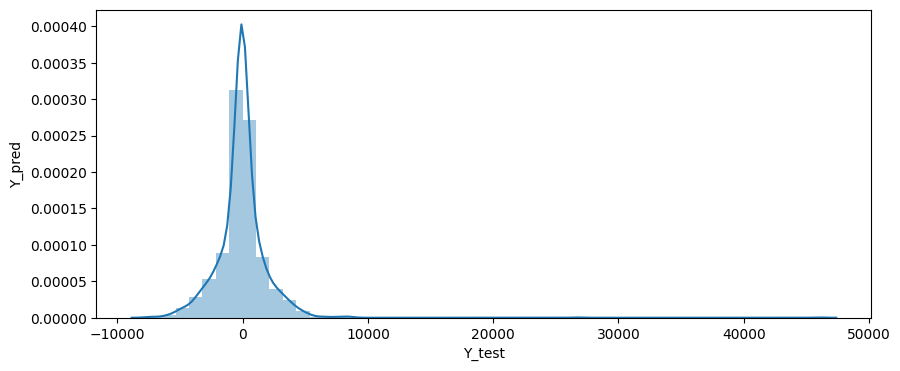

In [109]:
#plot between 'Y_test' and 'Y_pred'
sns.distplot(Y_test-Y_pred)
plt.xlabel('Y_test')
plt.ylabel('Y_pred')
plt.show()

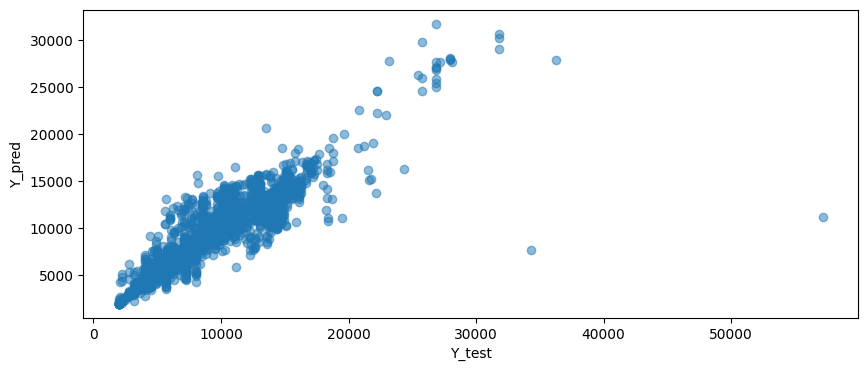

In [110]:
#scatter plot between 'Y_test' and 'Y_pred'
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.xlabel('Y_test')
plt.ylabel('Y_pred')
plt.show()

In [111]:
#import metrics
from sklearn import metrics

# calculate MAE, MSE, RMSE
print('MAE:', metrics.mean_absolute_error(Y_test, Y_pred))
print('MSE:', metrics.mean_squared_error(Y_test, Y_pred))
rmse = np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

MAE: 1181.7631174461296
MSE: 4422666.055932159
RMSE: 2103.0135653229054


In [112]:
# calculate RMSE/(max(DV)-min(DV))
rmse/(max(Y)-min(Y))

0.027047362356731

In [113]:
# calculate r2_score
r2 = metrics.r2_score(Y_test, Y_pred)
print(r2)

0.7948866291117024


# **HYPERPARAMETER TUNING**

In [114]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [115]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [116]:
# Random search of parameters, using 5 fold cross validation,
# search across 100 different combinations
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
rf_random = RandomizedSearchCV(estimator = RF_reg, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [117]:
rf_random.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   7.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [118]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [119]:
prediction = rf_random.predict(X_test)

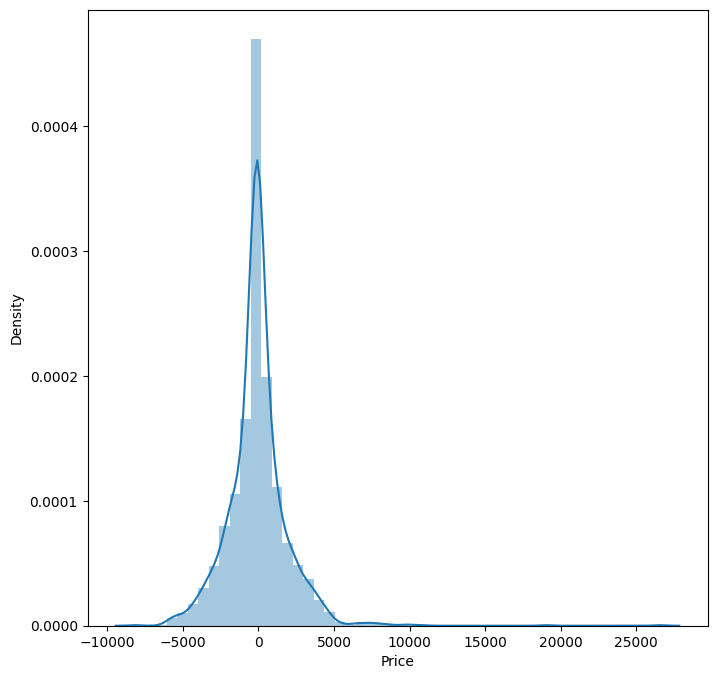

In [120]:
plt.figure(figsize = (8,8))
sns.distplot(Y_test-prediction)
plt.show()

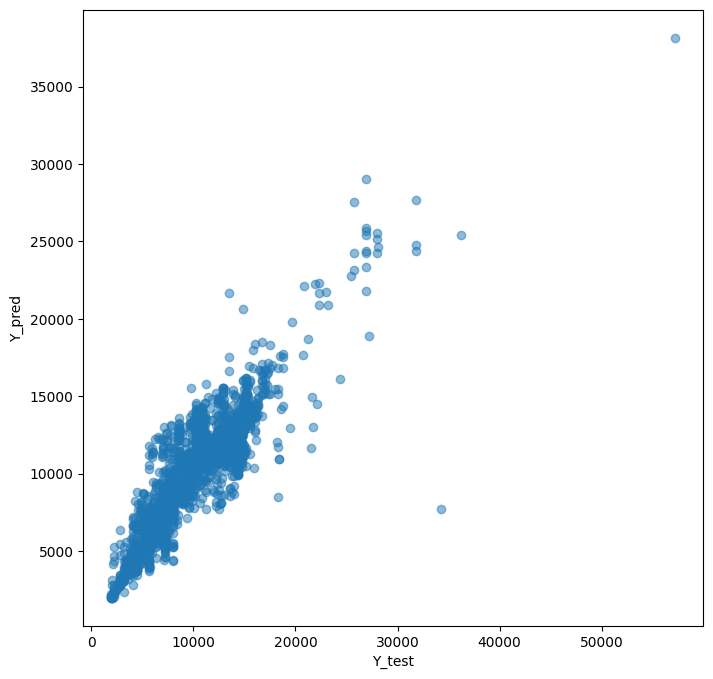

In [121]:
plt.figure(figsize = (8,8))
plt.scatter(Y_test, prediction, alpha = 0.5)
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.show()

In [122]:
print('MAE:', metrics.mean_absolute_error(Y_test, prediction))
print('MSE:', metrics.mean_squared_error(Y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, prediction)))

MAE: 1265.9837190790986
MSE: 3902853.2989968597
RMSE: 1975.5640457846107


# **Conclusion : The model as performed well when we use Randon Forest Regression giving us a good result of 0.81**